<a href="https://colab.research.google.com/github/AkarshaNalupurakkal98/Temperature-Prediction-Using-Machine-Learning-Approaches-Over-Indian-Region/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Introduction
Temperature prediction is a critical component of weather forecasting, which has significant applications in agriculture, disaster management, and climate science. This project aims to replicate and enhance the study titled "Temperature Prediction using Machine Learning Approaches" using the "High-Resolution Daily Gridded Temperature Data Set (1951-2016) for the Indian Region." The primary objectives are to develop and compare predictive models using Multiple Linear Regression (MLR), Artificial Neural Network (ANN), and Support Vector Machine (SVM), and to introduce new features and advanced modeling techniques to improve prediction accuracy.

##2. Environment Setup
In this section, we will set up our Google Colab environment by installing and importing the necessary libraries. This will prepare our workspace for data loading, preprocessing, and model developmen

In [2]:
# Install necessary libraries (uncomment if needed)
# !pip install pandas numpy matplotlib seaborn scikit-learn tensorflow keras

# Import libraries for data handling
import pandas as pd
import numpy as np
import os

# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Import libraries for neural networks
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Set visualization style
sns.set(style='whitegrid')


##3. Data Loading
In this section, we will load the high-resolution daily gridded temperature dataset from GitHub into our environment. The dataset includes maximum, minimum, and mean temperatures across a 31x31 grid, covering various years.

Download and Extract Data Files
First, we need to download the ZIP files from GitHub and extract them.

Mount Google Drive


In [11]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Define Directories


In [12]:
# Define directories for the dataset
mint_dir = '/content/drive/MyDrive/TEMP DATA 1BY1 (1951-2016)/MinT/'
maxt_dir = '/content/drive/MyDrive/TEMP DATA 1BY1 (1951-2016)/MaxT/'
meant_dir = '/content/drive/MyDrive/TEMP DATA 1BY1 (1951-2016)/MeanT/'


Functions to Load Data
These functions help in checking for leap years, reading the binary .GRD files, and loading the data from the specified directories.

In [13]:
# Function to check if a year is a leap year
def is_leap_year(year):
    return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

# Function to read binary .GRD files
def read_grd_file(file_path, days_in_year):
    try:
        with open(file_path, 'rb') as file:
            data = np.fromfile(file, dtype=np.float32)
            data = data.reshape((days_in_year, 31, 31))
            return data
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return np.array([])

# Function to load data from a directory
def load_data_from_directory(directory):
    data_frames = []
    print(f"Loading data from directory: {directory}")
    for file in sorted(os.listdir(directory)):
        if file.endswith('.GRD'):
            year = int(file[-8:-4])
            days_in_year = 366 if is_leap_year(year) else 365
            file_path = os.path.join(directory, file)
            print(f"Reading file: {file_path}")
            data = read_grd_file(file_path, days_in_year)
            if data.size > 0:
                for day in range(days_in_year):
                    df = pd.DataFrame(data[day], columns=[f'Lon_{i}' for i in range(31)])
                    df['Day'] = day + 1
                    df['Year'] = year
                    data_frames.append(df)
    if data_frames:
        return pd.concat(data_frames, axis=0)
    else:
        return pd.DataFrame()  # Return an empty DataFrame if no data was loaded


Load Dataset
Load the temperature data using the defined directories and functions.

In [9]:
# Load the temperature data
min_temp_data = load_data_from_directory(mint_dir)
max_temp_data = load_data_from_directory(maxt_dir)
mean_temp_data = load_data_from_directory(meant_dir)


Loading data from directory: /content/drive/MyDrive/TEMP DATA 1BY1 (1951-2016)/MinT/
Reading file: /content/drive/MyDrive/TEMP DATA 1BY1 (1951-2016)/MinT/MinT_1951.GRD
Reading file: /content/drive/MyDrive/TEMP DATA 1BY1 (1951-2016)/MinT/MinT_1952.GRD
Reading file: /content/drive/MyDrive/TEMP DATA 1BY1 (1951-2016)/MinT/MinT_1953.GRD
Reading file: /content/drive/MyDrive/TEMP DATA 1BY1 (1951-2016)/MinT/MinT_1954.GRD
Reading file: /content/drive/MyDrive/TEMP DATA 1BY1 (1951-2016)/MinT/MinT_1955.GRD
Reading file: /content/drive/MyDrive/TEMP DATA 1BY1 (1951-2016)/MinT/MinT_1956.GRD
Reading file: /content/drive/MyDrive/TEMP DATA 1BY1 (1951-2016)/MinT/MinT_1957.GRD
Reading file: /content/drive/MyDrive/TEMP DATA 1BY1 (1951-2016)/MinT/MinT_1958.GRD
Reading file: /content/drive/MyDrive/TEMP DATA 1BY1 (1951-2016)/MinT/MinT_1959.GRD
Reading file: /content/drive/MyDrive/TEMP DATA 1BY1 (1951-2016)/MinT/MinT_1960.GRD
Reading file: /content/drive/MyDrive/TEMP DATA 1BY1 (1951-2016)/MinT/MinT_1961.GRD
Re

Display Sample Data
Check if the data was loaded successfully and display the first few rows of each dataset.

In [14]:
# Check if data was loaded successfully
if not min_temp_data.empty:
    print("Min Temperature Data loaded successfully:")
    print(min_temp_data.head())
else:
    print("No Min Temperature Data found.")

if not max_temp_data.empty:
    print("Max Temperature Data loaded successfully:")
    print(max_temp_data.head())
else:
    print("No Max Temperature Data found.")

if not mean_temp_data.empty:
    print("Mean Temperature Data loaded successfully:")
    print(mean_temp_data.head())
else:
    print("No Mean Temperature Data found.")


Min Temperature Data loaded successfully:
       Lon_0      Lon_1      Lon_2      Lon_3      Lon_4      Lon_5  \
0  99.900002  99.900002  99.900002  99.900002  99.900002  99.900002   
1  99.900002  99.900002  99.900002  99.900002  99.900002  99.900002   
2  99.900002  99.900002  99.900002  99.900002  99.900002  99.900002   
3  99.900002  99.900002  99.900002  99.900002  99.900002  99.900002   
4  99.900002  99.900002  99.900002  99.900002  99.900002  18.540001   

       Lon_6      Lon_7      Lon_8      Lon_9  ...     Lon_23     Lon_24  \
0  99.900002  99.900002  99.900002  99.900002  ...  99.900002  99.900002   
1  22.469999  99.900002  99.900002  21.760000  ...  99.900002  99.900002   
2  99.900002  99.900002  99.900002  20.879999  ...  99.900002  99.900002   
3  99.900002  99.900002  18.540001  17.190001  ...  99.900002  99.900002   
4  99.900002  99.900002  16.940001  15.790000  ...  99.900002  99.900002   

      Lon_25     Lon_26     Lon_27     Lon_28     Lon_29     Lon_30  Day  

##4. Data Exploration and Visualization (EDA)
In this section, we will explore and visualize the loaded temperature data to understand its structure, identify patterns, and detect any anomalies. This will involve generating summary statistics, visualizing trends, and mapping spatial distributions.

Steps:
Summary Statistics:

Generate summary statistics for the minimum, maximum, and mean temperature data to understand the range, mean, median, and distribution of the temperature values.

In [15]:
# Summary Statistics for Min Temperature Data
print("Summary Statistics for Min Temperature Data:")
print(min_temp_data.describe())

# Summary Statistics for Max Temperature Data
print("\nSummary Statistics for Max Temperature Data:")
print(max_temp_data.describe())

# Summary Statistics for Mean Temperature Data
print("\nSummary Statistics for Mean Temperature Data:")
print(mean_temp_data.describe())


Summary Statistics for Min Temperature Data:
               Lon_0          Lon_1          Lon_2          Lon_3  \
count  747317.000000  747317.000000  747317.000000  747317.000000   
mean       99.899971      94.835350      87.152855      76.741516   
std         0.000000      19.335604      29.154697      36.354191   
min        99.900002       6.170000       1.090000       0.360000   
25%        99.900002      99.900002      99.900002      26.120001   
50%        99.900002      99.900002      99.900002      99.900002   
75%        99.900002      99.900002      99.900002      99.900002   
max        99.900002      99.900002      99.900002      99.900002   

               Lon_4          Lon_5          Lon_6          Lon_7  \
count  747317.000000  747317.000000  747317.000000  747317.000000   
mean       76.626396      64.546326      47.206821      35.695877   
std        36.536480      40.196011      39.436951      34.682529   
min        -0.050000      -6.990000      -8.680000      -

#Time Series Plots:

Visualize temperature trends over the years using line plots. This can help identify long-term trends, seasonal patterns, and any anomalies.

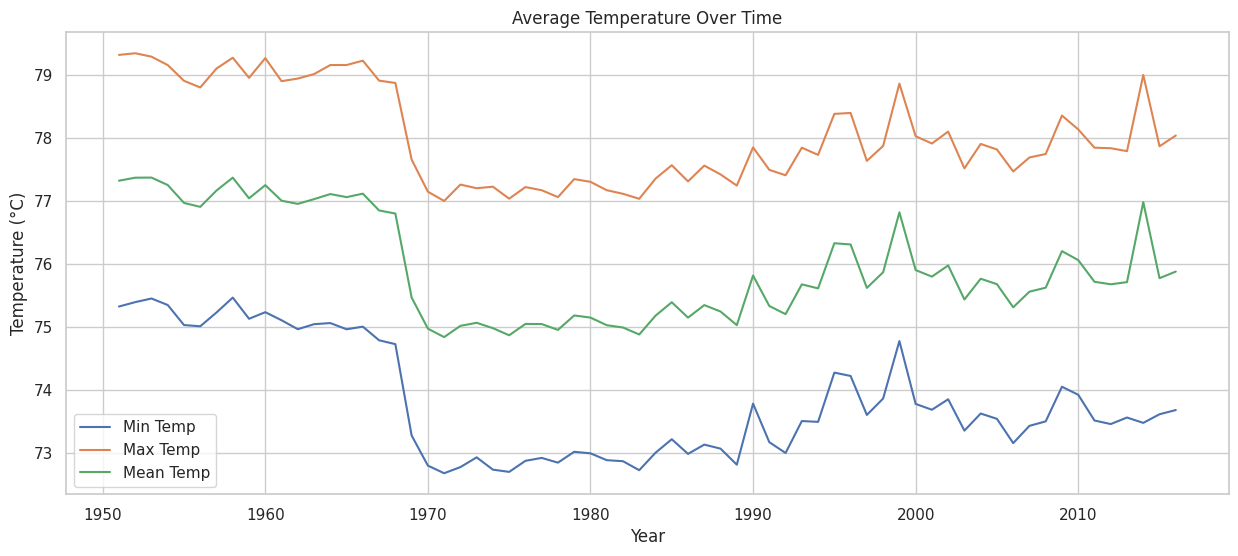

In [16]:
# Time Series Plots for Min, Max, and Mean Temperature

# Grouping data by year and calculating the mean temperature for each year
min_temp_yearly = min_temp_data.groupby('Year').mean().mean(axis=1)
max_temp_yearly = max_temp_data.groupby('Year').mean().mean(axis=1)
mean_temp_yearly = mean_temp_data.groupby('Year').mean().mean(axis=1)

plt.figure(figsize=(15, 6))
plt.plot(min_temp_yearly, label='Min Temp')
plt.plot(max_temp_yearly, label='Max Temp')
plt.plot(mean_temp_yearly, label='Mean Temp')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Average Temperature Over Time')
plt.legend()
plt.show()


# Spatial Visualization
 heatmaps to visualize the spatial distribution of temperatures. This will help us understand how temperatures vary across different grid points.

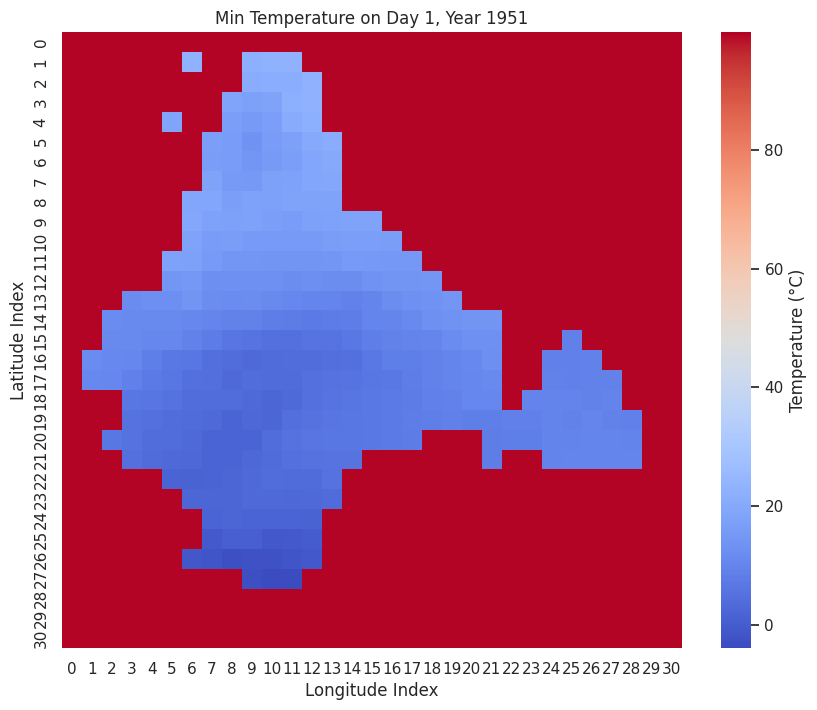

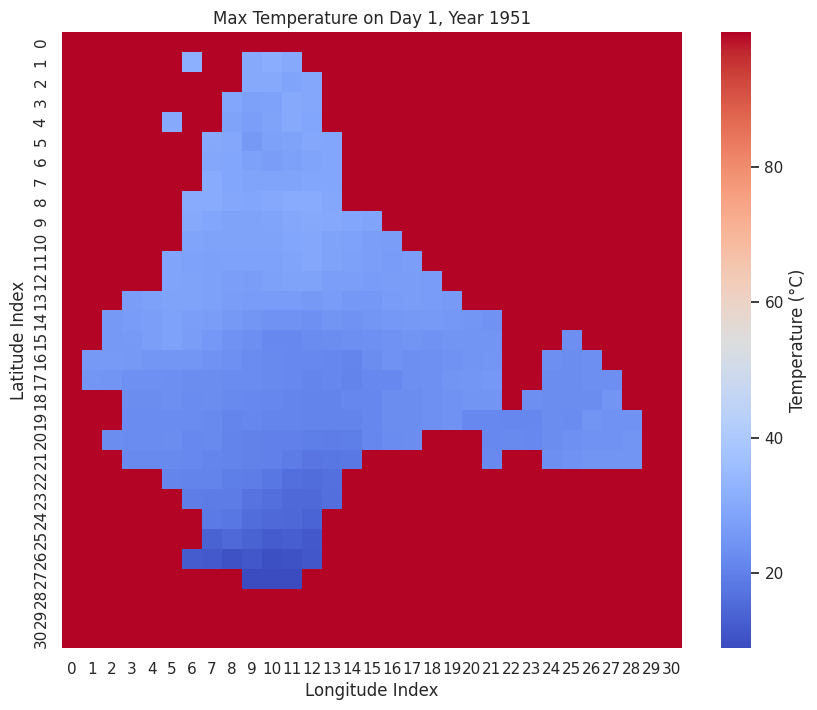

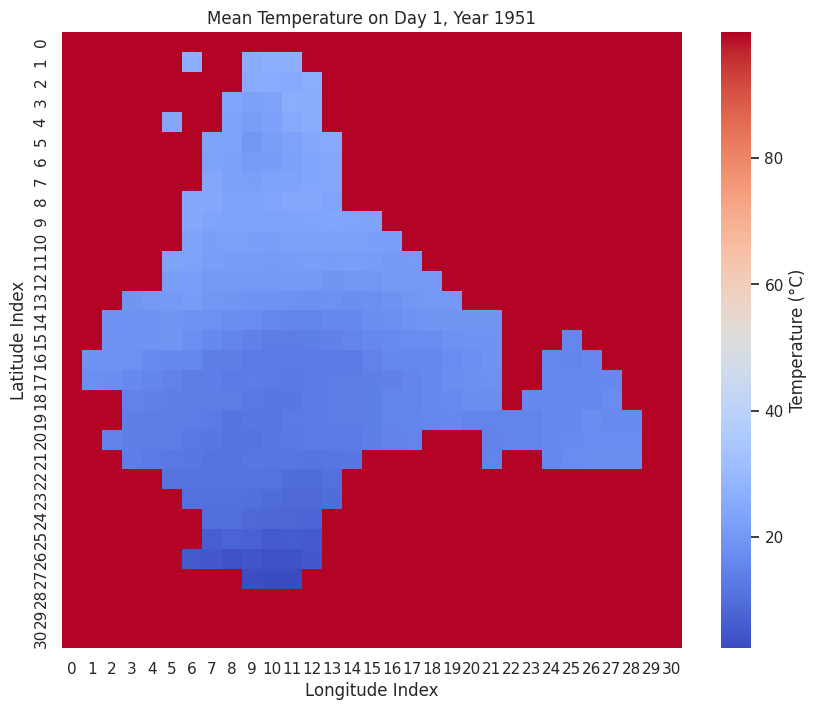

In [17]:
# Function to plot heatmap for a given day
def plot_heatmap(data, year, day, title):
    daily_data = data[(data['Year'] == year) & (data['Day'] == day)].iloc[:, :-2].values
    plt.figure(figsize=(10, 8))
    sns.heatmap(daily_data, cmap='coolwarm', cbar_kws={'label': 'Temperature (°C)'})
    plt.title(f'{title} on Day {day}, Year {year}')
    plt.xlabel('Longitude Index')
    plt.ylabel('Latitude Index')
    plt.show()

# Plot heatmap for Min Temperature Data for a sample day
plot_heatmap(min_temp_data, 1951, 1, 'Min Temperature')

# Plot heatmap for Max Temperature Data for a sample day
plot_heatmap(max_temp_data, 1951, 1, 'Max Temperature')

# Plot heatmap for Mean Temperature Data for a sample day
plot_heatmap(mean_temp_data, 1951, 1, 'Mean Temperature')


#5.1 Handle Missing Values

The first step in data preprocessing is to identify and handle any missing values in the dataset. Missing values can lead to inaccurate predictions and must be addressed. One common method is to fill missing values using interpolation or other techniques.

In [18]:
# Check for missing values
print("Missing values in Min Temperature Data:")
print(min_temp_data.isnull().sum().sum())

print("Missing values in Max Temperature Data:")
print(max_temp_data.isnull().sum().sum())

print("Missing values in Mean Temperature Data:")
print(mean_temp_data.isnull().sum().sum())

# Fill missing values using interpolation
min_temp_data = min_temp_data.interpolate()
max_temp_data = max_temp_data.interpolate()
mean_temp_data = mean_temp_data.interpolate()

# Verify that missing values are handled
print("Missing values after interpolation:")
print("Min Temperature Data:", min_temp_data.isnull().sum().sum())
print("Max Temperature Data:", max_temp_data.isnull().sum().sum())
print("Mean Temperature Data:", mean_temp_data.isnull().sum().sum())


Missing values in Min Temperature Data:
0
Missing values in Max Temperature Data:
0
Missing values in Mean Temperature Data:
0
Missing values after interpolation:
Min Temperature Data: 0
Max Temperature Data: 0
Mean Temperature Data: 0


##5.2 Normalize/Standardize Data
Normalize or standardize the data to ensure consistent scaling across features. Normalization scales the data to a range between 0 and 1, which is particularly useful when using machine learning algorithms that are sensitive to the scale of the data.

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to the data (excluding 'Day', 'Year', 'Month' columns)
min_temp_data_scaled = min_temp_data.copy()
max_temp_data_scaled = max_temp_data.copy()
mean_temp_data_scaled = mean_temp_data.copy()

min_temp_data_scaled.iloc[:, :-3] = scaler.fit_transform(min_temp_data.iloc[:, :-3])
max_temp_data_scaled.iloc[:, :-3] = scaler.fit_transform(max_temp_data.iloc[:, :-3])
mean_temp_data_scaled.iloc[:, :-3] = scaler.fit_transform(mean_temp_data.iloc[:, :-3])

# Display the scaled data
print("Scaled Min Temperature Data:")
print(min_temp_data_scaled.head())

print("\nScaled Max Temperature Data:")
print(max_temp_data_scaled.head())

print("\nScaled Mean Temperature Data:")
print(mean_temp_data_scaled.head())


Scaled Min Temperature Data:
   Lon_0  Lon_1  Lon_2  Lon_3  Lon_4     Lon_5     Lon_6  Lon_7     Lon_8  \
0    0.0    1.0    1.0    1.0    1.0  1.000000  1.000000    1.0  1.000000   
1    0.0    1.0    1.0    1.0    1.0  1.000000  0.286885    1.0  1.000000   
2    0.0    1.0    1.0    1.0    1.0  1.000000  1.000000    1.0  1.000000   
3    0.0    1.0    1.0    1.0    1.0  1.000000  1.000000    1.0  0.239839   
4    0.0    1.0    1.0    1.0    1.0  0.238844  1.000000    1.0  0.224890   

      Lon_9  ...  Lon_23  Lon_24  Lon_25  Lon_26  Lon_27  Lon_28  Lon_29  \
0  1.000000  ...     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
1  0.274870  ...     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
2  0.266704  ...     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
3  0.232461  ...     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
4  0.219469  ...     1.0     1.0     1.0     1.0     1.0     1.0     1.0   

      Lon_30  Day  Year  
0  99.900002    1  1951  

##5.3.1 Feature Engineering
Lagged Features
Explanation:
Lagged features involve using past values of a variable as predictors. For example, the temperature from the previous day(s) can be used to predict the current day's temperature. This helps the model to understand trends and patterns over time.

In [20]:
# Creating lagged features for temperature data
def create_lagged_features(data, lag=3):
    lagged_data = data.copy()
    for col in data.columns[:-3]:  # Exclude 'Day', 'Year', and 'Month' columns
        for i in range(1, lag+1):
            lagged_data[f'{col}_Lag_{i}'] = data[col].shift(i)
    return lagged_data

# Creating lagged features for Min, Max, and Mean temperature data
min_temp_data_lagged = create_lagged_features(min_temp_data_scaled, lag=3)
max_temp_data_lagged = create_lagged_features(max_temp_data_scaled, lag=3)
mean_temp_data_lagged = create_lagged_features(mean_temp_data_scaled, lag=3)

# Dropping rows with NaN values created due to lagging
min_temp_data_lagged.dropna(inplace=True)
max_temp_data_lagged.dropna(inplace=True)
mean_temp_data_lagged.dropna(inplace=True)

# Display the data with lagged features
print("Min Temperature Data with Lagged Features:")
print(min_temp_data_lagged.head())

print("\nMax Temperature Data with Lagged Features:")
print(max_temp_data_lagged.head())

print("\nMean Temperature Data with Lagged Features:")
print(mean_temp_data_lagged.head())


Min Temperature Data with Lagged Features:
   Lon_0  Lon_1  Lon_2  Lon_3  Lon_4     Lon_5  Lon_6     Lon_7     Lon_8  \
3    0.0    1.0    1.0    1.0    1.0  1.000000    1.0  1.000000  0.239839   
4    0.0    1.0    1.0    1.0    1.0  0.238844    1.0  1.000000  0.224890   
5    0.0    1.0    1.0    1.0    1.0  1.000000    1.0  0.229701  0.218163   
6    0.0    1.0    1.0    1.0    1.0  1.000000    1.0  0.227757  0.215360   
7    0.0    1.0    1.0    1.0    1.0  1.000000    1.0  0.244700  0.213585   

      Lon_9  ...  Lon_26_Lag_3  Lon_27_Lag_1  Lon_27_Lag_2  Lon_27_Lag_3  \
3  0.232461  ...           1.0           1.0           1.0           1.0   
4  0.219469  ...           1.0           1.0           1.0           1.0   
5  0.198311  ...           1.0           1.0           1.0           1.0   
6  0.208055  ...           1.0           1.0           1.0           1.0   
7  0.215293  ...           1.0           1.0           1.0           1.0   

   Lon_28_Lag_1  Lon_28_Lag_2  Lon_28

##5.3.2 Temperature Anomalies
Explanation:
Calculate temperature anomalies as the difference between daily temperatures and long-term averages. This helps in identifying deviations from normal patterns.

In [21]:
# Calculate temperature anomalies
def calculate_anomalies(data):
    # Calculate the long-term mean for each grid point (excluding the 'Day', 'Year', and 'Month' columns)
    long_term_means = data.iloc[:, :-3].mean()

    # Calculate the anomalies by subtracting the long-term mean from each daily value
    anomalies = data.iloc[:, :-3] - long_term_means

    # Rename the anomaly columns
    anomalies.columns = [f'{col}_anomaly' for col in anomalies.columns]

    # Concatenate the anomalies with the original data
    data = pd.concat([data, anomalies], axis=1)
    return data

# Calculate anomalies for Min, Max, and Mean Temperature Data
min_temp_data_anomalies = calculate_anomalies(min_temp_data_lagged)
max_temp_data_anomalies = calculate_anomalies(max_temp_data_lagged)
mean_temp_data_anomalies = calculate_anomalies(mean_temp_data_lagged)

# Display the data with anomaly features
print("Min Temperature Data with Anomalies:")
print(min_temp_data_anomalies.head())

print("\nMax Temperature Data with Anomalies:")
print(max_temp_data_anomalies.head())

print("\nMean Temperature Data with Anomalies:")
print(mean_temp_data_anomalies.head())


Min Temperature Data with Anomalies:
   Lon_0  Lon_1  Lon_2  Lon_3  Lon_4     Lon_5  Lon_6     Lon_7     Lon_8  \
3    0.0    1.0    1.0    1.0    1.0  1.000000    1.0  1.000000  0.239839   
4    0.0    1.0    1.0    1.0    1.0  0.238844    1.0  1.000000  0.224890   
5    0.0    1.0    1.0    1.0    1.0  1.000000    1.0  0.229701  0.218163   
6    0.0    1.0    1.0    1.0    1.0  1.000000    1.0  0.227757  0.215360   
7    0.0    1.0    1.0    1.0    1.0  1.000000    1.0  0.244700  0.213585   

      Lon_9  ...  Lon_25_Lag_3_anomaly  Lon_26_Lag_1_anomaly  \
3  0.232461  ...              0.241502               0.16482   
4  0.219469  ...              0.241502               0.16482   
5  0.198311  ...              0.241502               0.16482   
6  0.208055  ...              0.241502               0.16482   
7  0.215293  ...              0.241502               0.16482   

   Lon_26_Lag_2_anomaly  Lon_26_Lag_3_anomaly  Lon_27_Lag_1_anomaly  \
3               0.16482               0.1648

##5.3.3 Seasonal Indicators
Explanation:
Seasonal indicators help the model capture seasonality in the data by creating dummy variables for different seasons or months.

In [22]:
# Create seasonal indicators without fragmentation warning
def create_seasonal_indicators(data):
    # Create a 'Month' column by dividing 'Day' by 30 (approximate)
    data['Month'] = (data['Day'] // 30) % 12  # Modulo 12 to get months in a year

    # Create dummy variables for each month
    season_dummies = pd.get_dummies(data['Month'], prefix='Month')

    # Concatenate the dummy variables with the original data
    data = pd.concat([data, season_dummies], axis=1)

    return data

# Create seasonal indicators for Min, Max, and Mean Temperature Data
min_temp_data_final = create_seasonal_indicators(min_temp_data_anomalies)
max_temp_data_final = create_seasonal_indicators(max_temp_data_anomalies)
mean_temp_data_final = create_seasonal_indicators(mean_temp_data_anomalies)

# Display the data with seasonal indicators
print("Min Temperature Data with Seasonal Indicators:")
print(min_temp_data_final.head())

print("\nMax Temperature Data with Seasonal Indicators:")
print(max_temp_data_final.head())

print("\nMean Temperature Data with Seasonal Indicators:")
print(mean_temp_data_final.head())


<ipython-input-22-76a1974ca924>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Month'] = (data['Day'] // 30) % 12  # Modulo 12 to get months in a year
<ipython-input-22-76a1974ca924>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Month'] = (data['Day'] // 30) % 12  # Modulo 12 to get months in a year
<ipython-input-22-76a1974ca924>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Min Temperature Data with Seasonal Indicators:
   Lon_0  Lon_1  Lon_2  Lon_3  Lon_4     Lon_5  Lon_6     Lon_7     Lon_8  \
3    0.0    1.0    1.0    1.0    1.0  1.000000    1.0  1.000000  0.239839   
4    0.0    1.0    1.0    1.0    1.0  0.238844    1.0  1.000000  0.224890   
5    0.0    1.0    1.0    1.0    1.0  1.000000    1.0  0.229701  0.218163   
6    0.0    1.0    1.0    1.0    1.0  1.000000    1.0  0.227757  0.215360   
7    0.0    1.0    1.0    1.0    1.0  1.000000    1.0  0.244700  0.213585   

      Lon_9  ...  Month_2  Month_3  Month_4  Month_5  Month_6  Month_7  \
3  0.232461  ...    False    False    False    False    False    False   
4  0.219469  ...    False    False    False    False    False    False   
5  0.198311  ...    False    False    False    False    False    False   
6  0.208055  ...    False    False    False    False    False    False   
7  0.215293  ...    False    False    False    False    False    False   

   Month_8  Month_9  Month_10  Month_11  
3  

#6. Feature Selection
Explanation:
Feature selection involves choosing the most relevant features for the model to improve performance and reduce complexity. We'll use correlation analysis and other techniques to select the final features.

##6.1 Correlation Analysis
Explanation:
Correlation analysis helps identify which features are most strongly related to the target variable (e.g., temperature). Highly correlated features are more likely to be important predictors.

Correlation Matrix for Min Temperature Data:
          Lon_0     Lon_1     Lon_2     Lon_3     Lon_4     Lon_5     Lon_6  \
Lon_0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
Lon_1       NaN  1.000000  0.596074  0.406581  0.410931  0.299449  0.191246   
Lon_2       NaN  0.596074  1.000000  0.680223  0.682853  0.490251  0.312546   
Lon_3       NaN  0.406581  0.680223  1.000000  0.999924  0.720084  0.459800   
Lon_4       NaN  0.410931  0.682853  0.999924  1.000000  0.720195  0.459934   
...         ...       ...       ...       ...       ...       ...       ...   
Month_7     NaN  0.004260  0.007268  0.011509  0.011488  0.014849  0.023581   
Month_8     NaN  0.003395  0.005848  0.009345  0.009408  0.011858  0.018009   
Month_9     NaN  0.001783  0.002920  0.004141  0.004027  0.004505  0.005275   
Month_10    NaN -0.001959 -0.003735 -0.006847 -0.007386 -0.009569 -0.015449   
Month_11    NaN -0.006069 -0.010624 -0.017175 -0.017567 -0.022159 -0.032487   

      

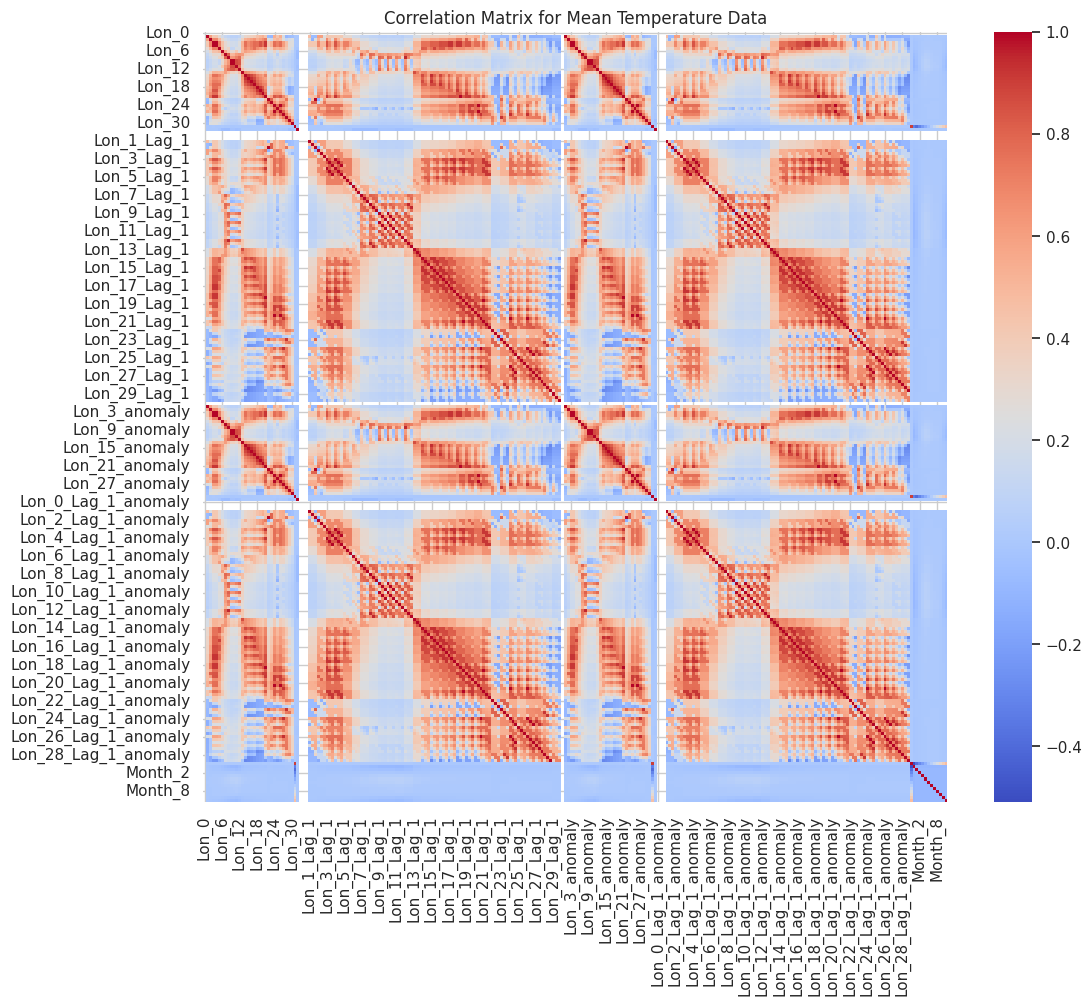


Selected Features for Min Temperature Data:
[]

Selected Features for Max Temperature Data:
[]

Selected Features for Mean Temperature Data:
[]


In [23]:
# Import necessary library
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix_min = min_temp_data_final.corr()
corr_matrix_max = max_temp_data_final.corr()
corr_matrix_mean = mean_temp_data_final.corr()

# Display the correlation matrix for Min Temperature Data
print("Correlation Matrix for Min Temperature Data:")
print(corr_matrix_min)

# Display the correlation matrix for Max Temperature Data
print("\nCorrelation Matrix for Max Temperature Data:")
print(corr_matrix_max)

# Display the correlation matrix for Mean Temperature Data
print("\nCorrelation Matrix for Mean Temperature Data:")
print(corr_matrix_mean)

# Visualize the correlation matrix for Mean Temperature Data (you can choose Min or Max as well)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_mean, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix for Mean Temperature Data')
plt.show()

# Select features with high correlation with the target variable (Mean Temperature for example)
target = 'Lon_0'  # Adjust according to your target column name (e.g., 'Mean_Temperature')
corr_threshold = 0.1  # Example threshold, adjust as needed

selected_features_min = corr_matrix_min[target][corr_matrix_min[target].abs() > corr_threshold].index.tolist()
selected_features_max = corr_matrix_max[target][corr_matrix_max[target].abs() > corr_threshold].index.tolist()
selected_features_mean = corr_matrix_mean[target][corr_matrix_mean[target].abs() > corr_threshold].index.tolist()

print("\nSelected Features for Min Temperature Data:")
print(selected_features_min)

print("\nSelected Features for Max Temperature Data:")
print(selected_features_max)

print("\nSelected Features for Mean Temperature Data:")
print(selected_features_mean)


Adjusting the Correlation Threshold
Since no features were selected, we can adjust the correlation threshold to select more features. Let's lower the threshold to see if more features are selected

In [24]:
# Adjust the correlation threshold to select more features
corr_threshold = 0.05  # Lowering the threshold

# Select features with high correlation with the target variable (Mean Temperature for example)
selected_features_min = corr_matrix_min[target][corr_matrix_min[target].abs() > corr_threshold].index.tolist()
selected_features_max = corr_matrix_max[target][corr_matrix_max[target].abs() > corr_threshold].index.tolist()
selected_features_mean = corr_matrix_mean[target][corr_matrix_mean[target].abs() > corr_threshold].index.tolist()

print("\nSelected Features for Min Temperature Data (lower threshold):")
print(selected_features_min)

print("\nSelected Features for Max Temperature Data (lower threshold):")
print(selected_features_max)

print("\nSelected Features for Mean Temperature Data (lower threshold):")
print(selected_features_mean)



Selected Features for Min Temperature Data (lower threshold):
[]

Selected Features for Max Temperature Data (lower threshold):
[]

Selected Features for Mean Temperature Data (lower threshold):
[]


In [25]:
# Check for NaN values in the target variable and fill them
min_temp_data_final['Lon_0'].fillna(min_temp_data_final['Lon_0'].mean(), inplace=True)
max_temp_data_final['Lon_0'].fillna(max_temp_data_final['Lon_0'].mean(), inplace=True)
mean_temp_data_final['Lon_0'].fillna(mean_temp_data_final['Lon_0'].mean(), inplace=True)

# Verify if there are any NaN values left
print("Missing values in target variable (Min Temperature):", min_temp_data_final['Lon_0'].isna().sum())
print("Missing values in target variable (Max Temperature):", max_temp_data_final['Lon_0'].isna().sum())
print("Missing values in target variable (Mean Temperature):", mean_temp_data_final['Lon_0'].isna().sum())


Missing values in target variable (Min Temperature): 0
Missing values in target variable (Max Temperature): 0
Missing values in target variable (Mean Temperature): 0


Using Feature Importance from Random Forest:
Random Forest can provide insights into the importance of different features.

In [3]:
import pandas as pd

# Function to sample data
def sample_data(data, fraction=0.1, random_state=42):
    return data.sample(frac=fraction, random_state=random_state)

# Sample the data
min_temp_data_sampled = sample_data(min_temp_data_final, fraction=0.1)
max_temp_data_sampled = sample_data(max_temp_data_final, fraction=0.1)
mean_temp_data_sampled = sample_data(mean_temp_data_final, fraction=0.1)

print("Sampled Min Temperature Data Shape:", min_temp_data_sampled.shape)
print("Sampled Max Temperature Data Shape:", max_temp_data_sampled.shape)
print("Sampled Mean Temperature Data Shape:", mean_temp_data_sampled.shape)


NameError: name 'min_temp_data_final' is not defined

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define target variable and feature set
target_variable = 'Lon_0'  # Example target variable, adjust as needed

# Random Forest for Min Temperature Data
X_min = min_temp_data_final.drop(columns=[target_variable])
y_min = min_temp_data_final[target_variable]

rf_min = RandomForestRegressor(n_estimators=100, random_state=42)
rf_min.fit(X_min, y_min)

importances_min = rf_min.feature_importances_
indices_min = np.argsort(importances_min)[::-1]

print("Feature importances for Min Temperature Data:")
for f in range(X_min.shape[1]):
    print(f"{X_min.columns[indices_min[f]]}: {importances_min[indices_min[f]]}")

# Random Forest for Max Temperature Data
X_max = max_temp_data_final.drop(columns=[target_variable])
y_max = max_temp_data_final[target_variable]

rf_max = RandomForestRegressor(n_estimators=100, random_state=42)
rf_max.fit(X_max, y_max)

importances_max = rf_max.feature_importances_
indices_max = np.argsort(importances_max)[::-1]

print("Feature importances for Max Temperature Data:")
for f in range(X_max.shape[1]):
    print(f"{X_max.columns[indices_max[f]]}: {importances_max[indices_max[f]]}")

# Random Forest for Mean Temperature Data
X_mean = mean_temp_data_final.drop(columns=[target_variable])
y_mean = mean_temp_data_final[target_variable]

rf_mean = RandomForestRegressor(n_estimators=100, random_state=42)
rf_mean.fit(X_mean, y_mean)

importances_mean = rf_mean.feature_importances_
indices_mean = np.argsort(importances_mean)[::-1]

print("Feature importances for Mean Temperature Data:")
for f in range(X_mean.shape[1]):
    print(f"{X_mean.columns[indices_mean[f]]}: {importances_mean[indices_mean[f]]}")


Feature importances for Min Temperature Data:
Month_11: 0.0
Lon_15_Lag_3: 0.0
Lon_20_Lag_1: 0.0
Lon_19_Lag_3: 0.0
Lon_19_Lag_2: 0.0
Lon_19_Lag_1: 0.0
Lon_18_Lag_3: 0.0
Lon_18_Lag_2: 0.0
Lon_18_Lag_1: 0.0
Lon_17_Lag_3: 0.0
Lon_17_Lag_2: 0.0
Lon_17_Lag_1: 0.0
Lon_16_Lag_3: 0.0
Lon_16_Lag_2: 0.0
Lon_16_Lag_1: 0.0
Lon_15_Lag_2: 0.0
Lon_20_Lag_3: 0.0
Lon_15_Lag_1: 0.0
Lon_14_Lag_3: 0.0
Lon_14_Lag_2: 0.0
Lon_14_Lag_1: 0.0
Lon_13_Lag_3: 0.0
Lon_13_Lag_2: 0.0
Lon_13_Lag_1: 0.0
Lon_12_Lag_3: 0.0
Lon_12_Lag_2: 0.0
Lon_12_Lag_1: 0.0
Lon_11_Lag_3: 0.0
Lon_11_Lag_2: 0.0
Lon_11_Lag_1: 0.0
Lon_20_Lag_2: 0.0
Lon_21_Lag_1: 0.0
Lon_10_Lag_2: 0.0
Lon_26_Lag_2: 0.0
Lon_2_anomaly: 0.0
Lon_1_anomaly: 0.0
Lon_0_anomaly: 0.0
Lon_29_Lag_3: 0.0
Lon_29_Lag_2: 0.0
Lon_29_Lag_1: 0.0
Lon_28_Lag_3: 0.0
Lon_28_Lag_2: 0.0
Lon_28_Lag_1: 0.0
Lon_27_Lag_3: 0.0
Lon_27_Lag_2: 0.0
Lon_27_Lag_1: 0.0
Lon_26_Lag_3: 0.0
Lon_26_Lag_1: 0.0
Lon_21_Lag_2: 0.0
Lon_25_Lag_3: 0.0
Lon_25_Lag_2: 0.0
Lon_25_Lag_1: 0.0
Lon_24_Lag_3: 0.0
L